In [1]:
from keras.datasets import imdb
import numpy as np
from keras import  models
from keras import layers
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
get_index_word = dict([(value, key)for (key, value) in word_index.items()])
decoded_review = ' '.join([get_index_word.get(i - 3, '?') for i in train_data[0]])
decoded_review

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [2]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(train_data.shape)
y_train = np.asarray(train_labels).astype('float32')
print(y_train.shape)
y_test = np.asarray(test_labels).astype('float32')

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

(25000,)
(25000,)


In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )
model.summary()
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history

Epoch 1/20
30/30 [==============================] - 17s 59ms/step - loss: 0.5985 - accuracy: 0.7148 - val_loss: 0.4099 - val_accuracy: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3452 - accuracy: 0.8989 - val_loss: 0.3286 - val_accuracy: 0.8753
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2450 - accuracy: 0.9281 - val_loss: 0.3056 - val_accuracy: 0.8790
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1927 - accuracy: 0.9422 - val_loss: 0.2747 - val_accuracy: 0.8899
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1533 - accuracy: 0.9551 - val_loss: 0.2784 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1272 - accuracy: 0.9630 - val_loss: 0.2856 - val_accuracy: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1080 - accuracy: 0.9689 - val_loss: 0.2976 - val_accuracy: 0.8859
Epoch 8/20
3

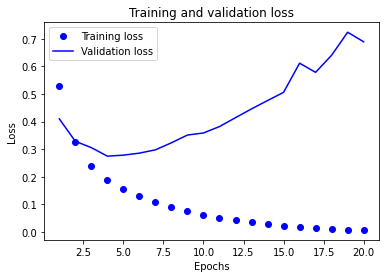

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

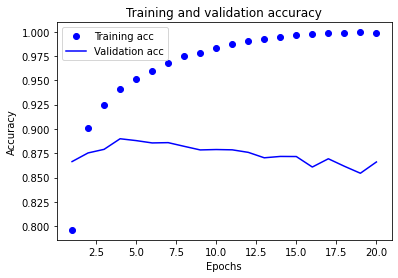

In [6]:
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [7]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 2s 2ms/step - loss: 0.7546 - accuracy: 0.8499
[0.7546273469924927, 0.8499199748039246]
